### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 


## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


### Дисциплина: Интеллектуальный анализ данных



##### Студент:  Липатникова Марина
##### Группа:   НФИбд-02-19



## Москва 2022
***


#### Задание на лабораторную работу №5


Для закрепленного за Вами варианта лабораторной работы:

    1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  

    2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

    3.	Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

    4.	Выполните стандартизацию признаков набора данных.  

    5.	Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

    6.	Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

    7.	Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

    8. 	Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

    9. 	Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  

    10.	Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.




# Индивидуальное задание



Лабораторная работа 5 – Вариант 5 

Credit Approval Data Set 

Название файла: crx.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Credit+Approval 

Класс: A16 (столбец No 16) 

Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier) 

Модели классификации: 

-       классификатор ближайших соседей (к-во соседей = 3) 

-       классификатор ближайших соседей (к-во соседей = 5) 

-       классификатор LDA 

Кривая для визуализации - ROC-кривая 

 

 1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [1]:

url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/credit-screening/crx.data"


In [2]:

import pandas as pd

data = pd.read_csv(url, header=None)

data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:

data.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
               'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16',]
data


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

Среди меток классов нет пропущенных значений и они бинарны.

In [4]:

import numpy as np


In [5]:

data = data.replace('?', np.NaN)


In [6]:

data.isnull().sum(axis=0)


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

3.	Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

In [7]:

data = data.drop(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], axis = 1)
data


,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,00202,0,+
1,58.67,4.460,3.04,6,00043,560,+
2,24.50,0.500,1.50,0,00280,824,+
3,27.83,1.540,3.75,5,00100,3,+
4,20.17,5.625,1.71,0,00120,0,+
...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,00260,0,-
686,22.67,0.750,2.00,2,00200,394,-
687,25.25,13.500,2.00,1,00200,1,-
688,17.92,0.205,0.04,0,00280,750,-


In [8]:

data.dtypes


A2      object
A3     float64
A8     float64
A11      int64
A14     object
A15      int64
A16     object
dtype: object

In [9]:

data['A16'] = data['A16'].replace('+', 1)
data['A16'] = data['A16'].replace('-', 0)
data


,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,00202,0,1
1,58.67,4.460,3.04,6,00043,560,1
2,24.50,0.500,1.50,0,00280,824,1
3,27.83,1.540,3.75,5,00100,3,1
4,20.17,5.625,1.71,0,00120,0,1
...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,00260,0,0
686,22.67,0.750,2.00,2,00200,394,0
687,25.25,13.500,2.00,1,00200,1,0
688,17.92,0.205,0.04,0,00280,750,0


In [10]:

data = data.replace('?', np.NaN)
data['A2'] = data['A2'].astype(float)
data['A14'] = data['A14'].astype(float)


Данные теперь численные.

In [11]:

data.dtypes


A2     float64
A3     float64
A8     float64
A11      int64
A14    float64
A15      int64
A16      int64
dtype: object

In [12]:

data.isnull().sum(axis=0)


A2     12
A3      0
A8      0
A11     0
A14    13
A15     0
A16     0
dtype: int64

In [13]:

data2 = data.copy()
pos = data2.copy()
pos = pos.loc[pos['A16'] == 1]
neg = data2.copy()
neg = neg.loc[neg['A16'] == 0]


In [14]:

data2


,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,0.500,1.50,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1
...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,0
686,22.67,0.750,2.00,2,200.0,394,0
687,25.25,13.500,2.00,1,200.0,1,0
688,17.92,0.205,0.04,0,280.0,750,0


In [15]:

pos_mean = np.mean(pos, axis = 0)
neg_mean = np.mean(neg, axis = 0)


In [16]:

pos_mean


A2       33.720492
A3        5.904951
A8        3.427899
A11       4.605863
A14     164.421927
A15    2038.859935
A16       1.000000
dtype: float64

In [17]:

neg_mean


A2      29.808231
A3       3.839948
A8       1.257924
A11      0.631854
A14    199.699468
A15    198.605744
A16      0.000000
dtype: float64

In [18]:

data2[data2['A16'] == 1] = (data2[data2['A16'] == 1]).fillna({'A2': pos_mean[0], 'A14': pos_mean[4]})
data2[data2['A16'] == 0] = (data2[data2['A16'] == 0]).fillna({'A2': neg_mean[0], 'A14': neg_mean[4]})
data2.isnull().sum(axis=0)


A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
A16    0
dtype: int64

Проверка средних значений в таблице (для столбца A2).

In [19]:

data2.loc[data2['A2'] == pos_mean[0]]


,A2,A3,A8,A11,A14,A15,A16
500,33.720492,4.0,5.0,3,290.0,2279,1
515,33.720492,10.5,6.5,0,0.0,0,1


In [20]:

data2.loc[data2['A2'] == neg_mean[0]]


,A2,A3,A8,A11,A14,A15,A16
83,29.808231,3.500,3.000,0,300.000000,0,0
86,29.808231,0.375,0.875,0,928.000000,0,0
92,29.808231,5.000,8.500,0,0.000000,0,0
97,29.808231,0.500,0.835,0,320.000000,0,0
254,29.808231,0.625,0.250,0,380.000000,2010,0
286,29.808231,1.500,0.000,2,200.000000,105,0
329,29.808231,4.000,0.085,0,411.000000,0,0
445,29.808231,11.250,0.000,0,199.699468,5200,0
450,29.808231,3.000,7.000,0,0.000000,1,0
608,29.808231,0.040,4.250,0,460.000000,0,0


4.    Выполните стандартизацию признаков набора данных.  

In [21]:

X = data2.copy()
X = X.drop(['A16'], axis = 1)
X


,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1,202.0,0
1,58.67,4.460,3.04,6,43.0,560
2,24.50,0.500,1.50,0,280.0,824
3,27.83,1.540,3.75,5,100.0,3
4,20.17,5.625,1.71,0,120.0,0
...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0
686,22.67,0.750,2.00,2,200.0,394
687,25.25,13.500,2.00,1,200.0,1
688,17.92,0.205,0.04,0,280.0,750


In [22]:

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)


In [23]:

c = data2['A16']


In [24]:

df4 = pd.DataFrame(X_standard)
df4.columns = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
df4['A16'] = c
df4


,A2,A3,A8,A11,A14,A15,A16
0,-0.060682,-0.956613,-0.291083,-0.288101,0.104599,-0.195413,1
1,2.289255,-0.060051,0.244190,0.740830,-0.819543,-0.087852,1
2,-0.594988,-0.856102,-0.216324,-0.493887,0.557952,-0.037144,1
3,-0.313908,-0.647038,0.456505,0.535044,-0.488247,-0.194837,1
4,-0.960478,0.174141,-0.153526,-0.493887,-0.372002,-0.195413,1
...,...,...,...,...,...,...,...
685,-0.883666,1.070704,-0.291083,-0.493887,0.441708,-0.195413,0
686,-0.749456,-0.805846,-0.066806,-0.082314,0.092975,-0.119736,0
687,-0.531682,1.757198,-0.066806,-0.288101,0.092975,-0.195221,0
688,-1.150397,-0.915403,-0.652915,-0.493887,0.557952,-0.051358,0


5.	Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier).

In [25]:

from sklearn.ensemble import ExtraTreesClassifier

array = df4.values
X5 = array[:,0:6]
Y5 = array[:,6] 

# отбор признаков
model = ExtraTreesClassifier()
model.fit(X5, Y5)
print(model.feature_importances_)


[0.1401035  0.14954581 0.20416967 0.22089502 0.13275012 0.15253586]


Проверяем, что больше 10 различных значений:

In [26]:

c = df4['A8']
a = c.unique()
count = 0
for i in a:
    count+=1
count


132

In [27]:

c = df4['A11']
a = c.unique()
count = 0
for i in a:
    count+=1
count


23

Делаем вывод, что признаки A8 и A11 подходят.

6.	Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [28]:

df6_pos = df4.copy()
df6_pos = df6_pos.loc[df6_pos['A16'] == 1]
df6_pos


,A2,A3,A8,A11,A14,A15,A16
0,-0.060682,-0.956613,-0.291083,-0.288101,0.104599,-0.195413,1
1,2.289255,-0.060051,0.244190,0.740830,-0.819543,-0.087852,1
2,-0.594988,-0.856102,-0.216324,-0.493887,0.557952,-0.037144,1
3,-0.313908,-0.647038,0.456505,0.535044,-0.488247,-0.194837,1
4,-0.960478,0.174141,-0.153526,-0.493887,-0.372002,-0.195413,1
...,...,...,...,...,...,...,...
599,-0.932623,-0.471143,-0.066806,1.769760,0.092975,0.380809,1
600,-0.172945,-0.864143,-0.503398,0.329258,1.139174,-0.099376,1
606,-1.298113,-0.948572,-0.652915,-0.493887,-1.069468,-0.195413,1
621,-0.749456,-0.923444,0.007953,-0.493887,-1.069468,-0.195413,1


In [29]:

df6_neg = df4.copy()
df6_neg = df6_neg.loc[df6_neg['A16'] == 0]
df6_neg


,A2,A3,A8,A11,A14,A15,A16
70,0.065931,0.551059,-0.190906,-0.493887,1.371662,-0.195413,0
71,0.276953,-0.152521,3.073064,-0.493887,0.091228,-0.195413,0
72,0.593485,0.048502,3.372099,-0.493887,4.626503,-0.195413,0
73,1.072083,-0.856102,2.549752,-0.493887,1.255418,-0.195413,0
74,1.121040,0.450548,-0.178944,-0.493887,-0.139514,-0.195029,0
...,...,...,...,...,...,...,...
685,-0.883666,1.070704,-0.291083,-0.493887,0.441708,-0.195413,0
686,-0.749456,-0.805846,-0.066806,-0.082314,0.092975,-0.119736,0
687,-0.531682,1.757198,-0.066806,-0.288101,0.092975,-0.195221,0
688,-1.150397,-0.915403,-0.652915,-0.493887,0.557952,-0.051358,0


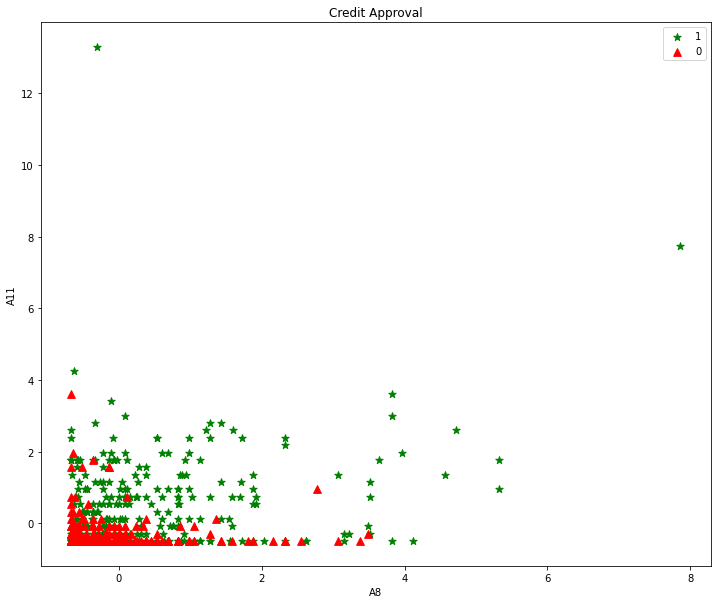

In [30]:

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
ax = plt.axes()

xs_p = df6_pos.A8
ys_p = df6_pos.A11
scatter = ax.scatter( xs_p, ys_p, c = 'g', s=60, marker='*')
xs_n = df6_neg.A8
ys_n = df6_neg.A11
scatter = ax.scatter( xs_n, ys_n, c = 'r', s=60, marker='^')
ax.set_xlabel('A8')
ax.set_ylabel('A11')

ax = plt.title("Credit Approval")
plt.legend(labels=['1','0'])


7.	Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

Модели классификации: 

-       классификатор ближайших соседей (к-во соседей = 3) 

-       классификатор ближайших соседей (к-во соседей = 5) 

-       классификатор LDA 

In [31]:

X7 = df4.copy()
X7 = X7[['A8','A11']]
X7


,A8,A11
0,-0.291083,-0.288101
1,0.244190,0.740830
2,-0.216324,-0.493887
3,0.456505,0.535044
4,-0.153526,-0.493887
...,...,...
685,-0.291083,-0.493887
686,-0.066806,-0.082314
687,-0.066806,-0.288101
688,-0.652915,-0.493887


In [32]:

y7 = df4.copy()
y7 = y7['A16']


In [33]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X7, y7, test_size=0.3, random_state=666)
  

In [34]:

from sklearn.neighbors import KNeighborsClassifier

kNN_clf = KNeighborsClassifier(n_neighbors=3) # создаем классификатор
kNN_clf.fit(X_train, y_train)                 # обучаем классификатор


KNeighborsClassifier(n_neighbors=3)

In [35]:

y_pred = kNN_clf.predict(X_test)
sum(y_pred == y_test)
sum(y_pred == y_test) / len(y_test)


0.7632850241545893

In [36]:


kNN_clf2 = KNeighborsClassifier(n_neighbors=5) # создаем классификатор
kNN_clf2.fit(X_train, y_train)                 # обучаем классификатор


KNeighborsClassifier()

In [37]:

y_pred2 = kNN_clf2.predict(X_test)
sum(y_pred2 == y_test)
sum(y_pred2 == y_test) / len(y_test)


0.748792270531401

In [38]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X_train, y_train)


In [39]:

y_pred3 = lda.predict(X_test)
sum(y_pred3 == y_test)
sum(y_pred3 == y_test) / len(y_test)


0.7342995169082126

8. 	Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

In [40]:

data8_p = df4.copy()
data8_p = data8_p[['A8','A11','A16']]
data8_p = data8_p.loc[data8_p['A16'] == 1]
data8_p = data8_p.drop(['A16'], axis = 1)
data8_p


,A8,A11
0,-0.291083,-0.288101
1,0.244190,0.740830
2,-0.216324,-0.493887
3,0.456505,0.535044
4,-0.153526,-0.493887
...,...,...
599,-0.066806,1.769760
600,-0.503398,0.329258
606,-0.652915,-0.493887
621,0.007953,-0.493887


In [41]:

data8_n = df4.copy()
data8_n = data8_n[['A8','A11','A16']]
data8_n = data8_n.loc[data8_n['A16'] == 0]
data8_n = data8_n.drop(['A16'], axis = 1)
data8_n


,A8,A11
70,-0.190906,-0.493887
71,3.073064,-0.493887
72,3.372099,-0.493887
73,2.549752,-0.493887
74,-0.178944,-0.493887
...,...,...
685,-0.291083,-0.493887
686,-0.066806,-0.082314
687,-0.066806,-0.288101
688,-0.652915,-0.493887


In [42]:

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


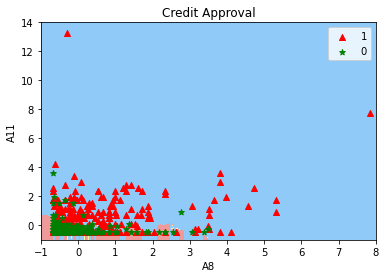

In [43]:

plot_decision_boundary(kNN_clf, axis=[-1, 8, -1, 14])
scatter1 = plt.scatter(data8_p['A8'], data8_p['A11'], c='r', marker="^", label = '1')
scatter2 = plt.scatter(data8_n['A8'], data8_n['A11'], c='g', marker="*", label = '0')
plt.xlabel("A8")
plt.ylabel("A11")
plt.legend(handles=[scatter1, scatter2])
plt.title("Credit Approval");


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


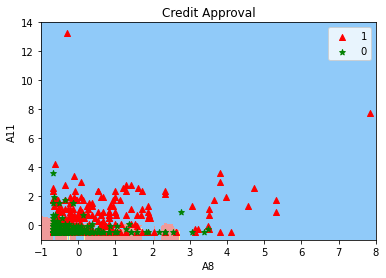

In [44]:

plot_decision_boundary(kNN_clf2, axis=[-1, 8, -1, 14])
scatter1 = plt.scatter(data8_p['A8'], data8_p['A11'], c='r', marker="^", label = '1')
scatter2 = plt.scatter(data8_n['A8'], data8_n['A11'], c='g', marker="*", label = '0')
plt.xlabel("A8")
plt.ylabel("A11")
plt.legend(handles=[scatter1, scatter2])
plt.title("Credit Approval");


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


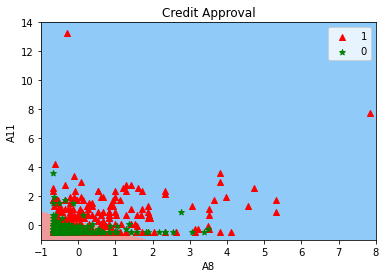

In [45]:

plot_decision_boundary(lda, axis=[-1, 8, -1, 14])
scatter1 = plt.scatter(data8_p['A8'], data8_p['A11'], c='r', marker="^", label = '1')
scatter2 = plt.scatter(data8_n['A8'], data8_n['A11'], c='g', marker="*", label = '0')
plt.xlabel("A8")
plt.ylabel("A11")
plt.legend(handles=[scatter1, scatter2])
plt.title("Credit Approval");


9. 	Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов. 

Кривая для визуализации - ROC-кривая 

In [46]:

decision_scores = kNN_clf.predict_proba(X_test)[:,1]


In [47]:

decision_scores2 = kNN_clf2.predict_proba(X_test)[:,1]


In [48]:

decision_scores3 = lda.decision_function(X_test)


In [49]:

from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
fprs2, tprs2, thresholds2 = roc_curve(y_test, decision_scores2)
fprs3, tprs3, thresholds3 = roc_curve(y_test, decision_scores3)


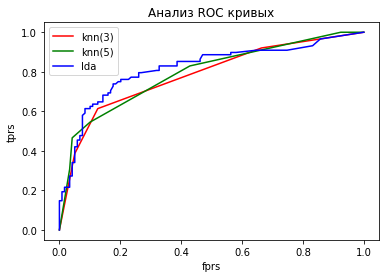

In [50]:

plt.plot(fprs, tprs, c='r', label = 'knn(3)');
plt.plot(fprs2, tprs2, c='g', label = 'knn(5)');
plt.plot(fprs3, tprs3, c='b', label = 'lda');
plt.legend()
plt.xlabel("fprs")
plt.ylabel("tprs")
plt.title("Анализ ROC кривых");


10.	Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.

In [51]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)


0.7828495034377387

In [52]:

roc_auc_score(y_test, decision_scores2)


0.7926375095492743

In [53]:

roc_auc_score(y_test, decision_scores3)


0.8178475935828876

Таким образом, лучший метод - LDA.